## EDA

the main aim of this work is to get insights 
1. which categories are mostly ordered
2. which state/region customers are mostly order product
3. to view improvement of service (delivary days)
4. at which year was the profit, quantity and total_profit was increasing and decreasing for each category
5. relationship between numerical columns (discount vs profit,...)
6. and others more

this dataset is superstore sales dataset in USA.(I got the dataset from tableau repository)

the dataset has many columns let's see some of them.
1. segment: the customers separate marketing strategies to appeal to consumers with different needs, interests, budgets or other attributes eg. cusomers,corporate
2. city,state,region,postalcode,country: location at which the customer is live.
3. category,sub-category,product-name, productid: specification about the product
4. customer-id,customername: basic info about the customer
5. order date: the date at which the customer order the product
6. ship date: the date at which the customer receive their ordered product

1. cleaning data
2. extracting other column like (waiting date to receive the ordered product, total sales)
3. merging two tables
4. categorical analysis
5. numerical analysis
6. time series analysis
a. yearly
b. quarterly

here I use different charts and methods
1. line chart, bar plot, cat plot, pie chart, donut chart 
2. methods: resample, rolling
read https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78 , https://www.geeksforgeeks.org/python-pandas-dataframe-resample/ to understand resample
read https://www.geeksforgeeks.org/python-pandas-series-rolling/#:~:text=rolling()%20function%20is%20a,in%20the%20given%20Series%20object.&text=center%20%3A%20Set%20the%20labels%20at%20the%20center%20of%20the%20window. to understand rolling
3. pivot table

importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

loading the dataset

In [2]:
 pd.set_option('display.max_columns', None)
df=pd.read_excel("Sample - Superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# looking non-null and dtypes of all columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [4]:
#basic statistical describtion
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
# droping row id
df.drop('Row ID',axis=1,inplace=True)

In [6]:
#looking missing values:
mis=0
for f in df.columns:
    if(df[f].isnull().sum()>0):
        mis+=1
        print('{} has {}% of missing values'.format(f,(df[f].isnull().sum()/df.shape[0])*100))
print('{} features have missing values'.format(mis))

Postal Code has 0.11006603962377427% of missing values
1 features have missing values


In [7]:
df['Postal Code'].dtype

dtype('float64')

looking why the postal code is missed or for which city is the postal code is missed?

In [8]:
df[df['Postal Code'].isnull()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2234,CA-2021-104066,2021-12-05,2021-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
5274,CA-2019-162887,2019-11-07,2019-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,US-2020-150140,2020-04-06,2020-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9146,US-2020-165505,2020-01-23,2020-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
9147,US-2020-165505,2020-01-23,2020-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
9148,US-2020-165505,2020-01-23,2020-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
9386,US-2021-127292,2021-01-19,2021-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
9387,US-2021-127292,2021-01-19,2021-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
9388,US-2021-127292,2021-01-19,2021-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232
9389,US-2021-127292,2021-01-19,2021-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588


from the above exploration, the missed value is only for Burlington city east region, so let's go other exploration

In [9]:
df[df['City']=='Burlington']

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
683,US-2021-168116,2021-11-04,2021-11-04,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
684,US-2021-168116,2021-11-04,2021-11-04,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,167.440,2,0.2,14.6510
1008,US-2021-106705,2021-12-26,2022-01-01,Standard Class,PO-18850,Patrick O'Brill,Consumer,United States,Burlington,Iowa,52601.0,Central,OFF-PA-10001509,Office Supplies,Paper,"Recycled Desk Saver Line ""While You Were Out"" ...",44.750,5,0.0,20.5850
1038,CA-2021-121818,2021-11-20,2021-11-21,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10000203,Office Supplies,Art,Newell 336,23.968,7,0.2,2.6964
1039,CA-2021-121818,2021-11-20,2021-11-21,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10004790,Office Supplies,Art,Staples in misc. colors,28.728,3,0.2,1.7955
1393,CA-2021-124828,2021-07-03,2021-07-04,First Class,YS-21880,Yana Sorensen,Corporate,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10003514,Office Supplies,Art,4009 Highlighters by Sanford,9.552,3,0.2,1.5522
2234,CA-2021-104066,2021-12-05,2021-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.030,7,0.0,67.6599
2928,US-2021-120390,2021-10-19,2021-10-26,Standard Class,TH-21550,Tracy Hopkins,Home Office,United States,Burlington,North Carolina,27217.0,South,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1633.188,4,0.7,-1306.5504
5065,CA-2021-142090,2021-11-30,2021-12-07,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,TEC-AC-10002001,Technology,Accessories,Logitech Wireless Gaming Headset G930,383.976,3,0.2,81.5949
5066,CA-2021-142090,2021-11-30,2021-12-07,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,FUR-TA-10001889,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1781.682,7,0.4,-653.2834


In [10]:
# imputing missing value
# the postal code of East is 08016
df['Postal Code'].fillna(08016.0,inplace=True)

In [11]:
# change the data type of postal code to int
df['Postal Code']=df['Postal Code'].astype(int)

In [12]:
#looking missing values:
mis=0
for f in df.columns:
    if(df[f].isnull().sum()>0):
        mis+=1
        print('{} has {}% of missing values'.format(f,(df[f].isnull().sum()/df.shape[0])*100))
print('{} features have missing values'.format(mis))

0 features have missing values


#### Transform

In [13]:
#transformation 
# sales * quantity will be the total sales 
df['total sale']=round(df['Sales']*df['Quantity'],2)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,total sale
0,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.92
1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.82
2,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.24
3,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4787.89
4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,44.74


In [14]:
# let's extract the waiting of customers to recieve the product after he order
#shipdate-orderdate
df['waiting(in days)'] = (df['Ship Date'] - df['Order Date']).dt.days
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,total sale,waiting(in days)
0,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.92,3
1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.82,3
2,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.24,4
3,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4787.89,7
4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,44.74,7


loading the second table

In [15]:
manager=pd.read_excel('people.xlsx')
manager.head()

,Regional Manager,Region
0,Sadie Pawthorne,West
1,Chuck Magee,East
2,Roxanne Rodriguez,Central
3,Fred Suzuki,South


merging the two tables by the region columns

1. the first table contains many necessary information that related to transaction
2. the second table contains the regional managers.


both tables have one common column that is Region

In [16]:
df_final=pd.merge(df,manager,on=['Region','Region'])
df_final.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,total sale,waiting(in days),Regional Manager
0,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.92,3,Fred Suzuki
1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.82,3,Fred Suzuki
2,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4787.89,7,Fred Suzuki
3,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,44.74,7,Fred Suzuki
4,CA-2021-114412,2021-04-15,2021-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520,3,0.20,5.4432,46.66,5,Fred Suzuki


#the dataset is ready for analysis

### Categorical Analysis

In [17]:
categorical=df_final.select_dtypes(include='O').columns.tolist()
for i in categorical:
    print('{} has {} categorical'.format(i,len(df_final[i].unique())))

Order ID has 5009 categorical
Ship Mode has 4 categorical
Customer ID has 793 categorical
Customer Name has 793 categorical
Segment has 3 categorical
Country/Region has 1 categorical
City has 531 categorical
State has 49 categorical
Region has 4 categorical
Product ID has 1862 categorical
Category has 3 categorical
Sub-Category has 17 categorical
Product Name has 1849 categorical
Regional Manager has 4 categorical


In [18]:
# removing some name of categorical columns that are not much important to perform analysis
# many of thus are distinct in each rows, and country/region is same in every row (that is USA)
unwanted_num = {'Order ID','Customer ID','Customer Name','Product ID','Product Name','Country/Region','City'}
categorical=[ele for ele in categorical if ele not in unwanted_num]
categorical

['Ship Mode',
 'Segment',
 'State',
 'Region',
 'Category',
 'Sub-Category',
 'Regional Manager']

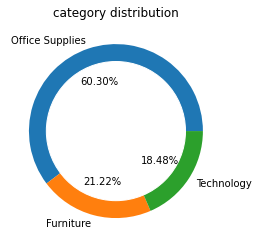

In [19]:
# looking category count
plt.rcParams["figure.figsize"]=(4,4)
plt.pie(x=df_final["Category"].value_counts(), labels=df_final["Category"].value_counts().index, autopct=lambda x:f"{x:.2f}%");
plt.title('category distribution')
circle = plt.Circle( (0,0), 0.8, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()
#

observation:
1. office supplies is the popular category

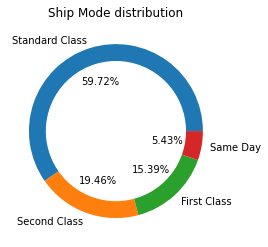

In [20]:
# looking category count
plt.rcParams["figure.figsize"]=(4,4)
plt.pie(x=df_final["Ship Mode"].value_counts(), labels=df_final["Ship Mode"].value_counts().index, autopct=lambda x:f"{x:.2f}%");
plt.title('Ship Mode distribution')
circle = plt.Circle( (0,0), 0.8, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()
#

1.standard class is the most popular ship mode

In [21]:
def univariate(col):
    plt.figure(figsize=(12,12))
    sns.countplot(col,data=df_final)
    plt.title('{} distribution'.format(col))
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=90)
    plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


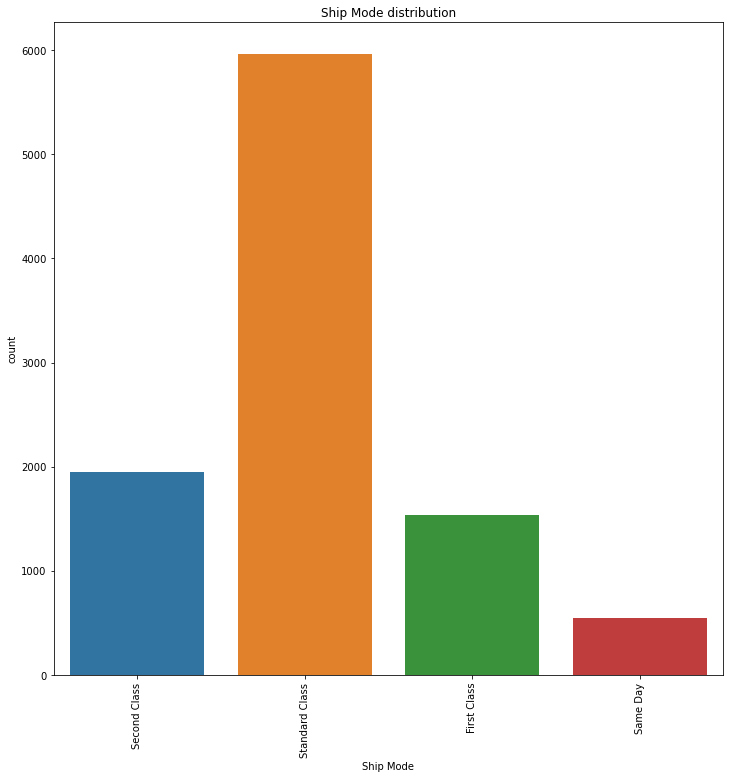

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


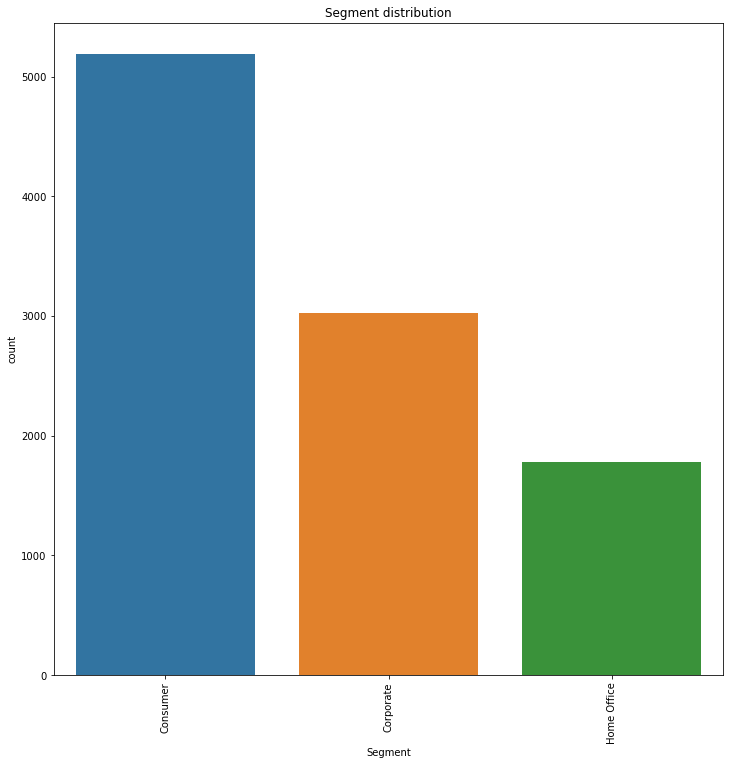

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


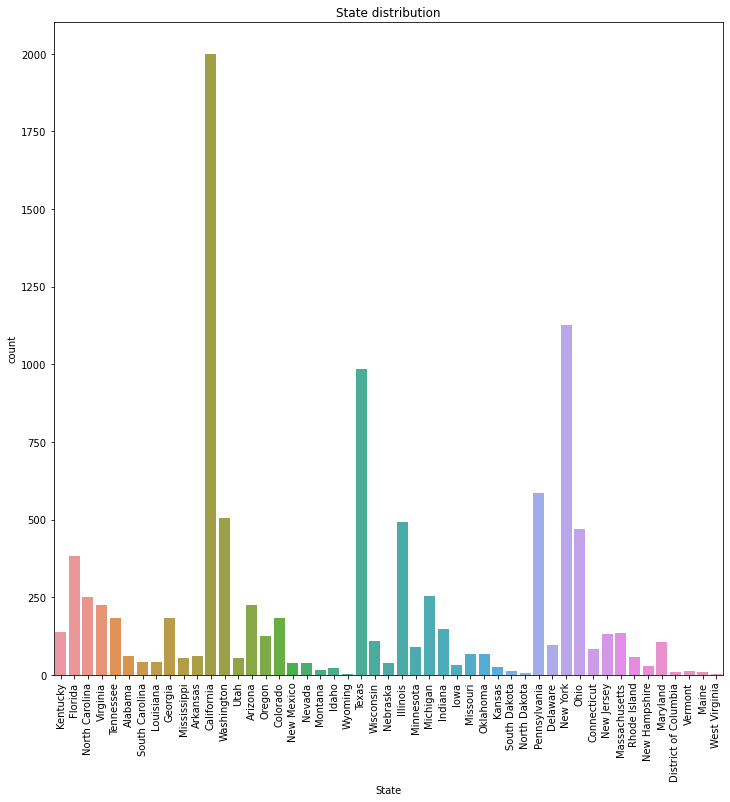

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


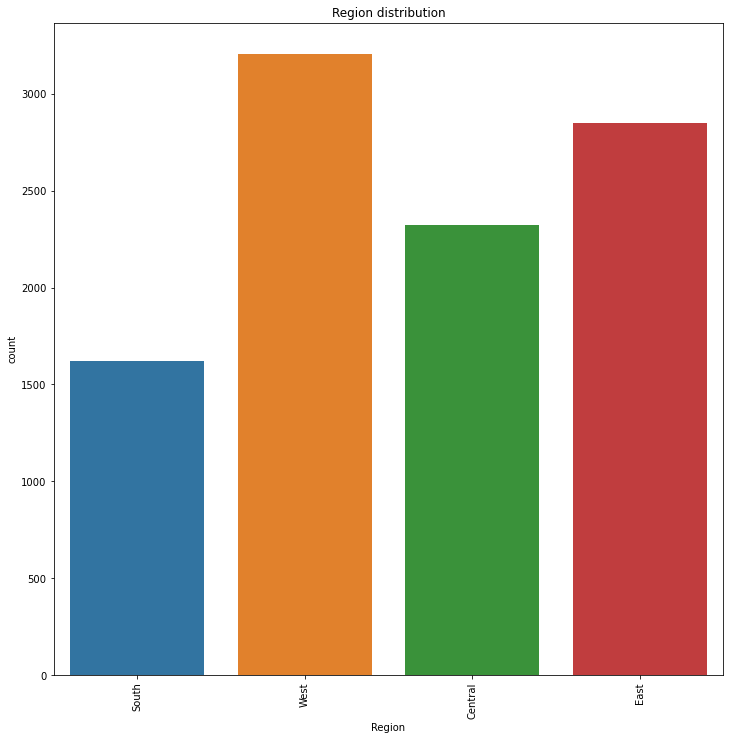

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


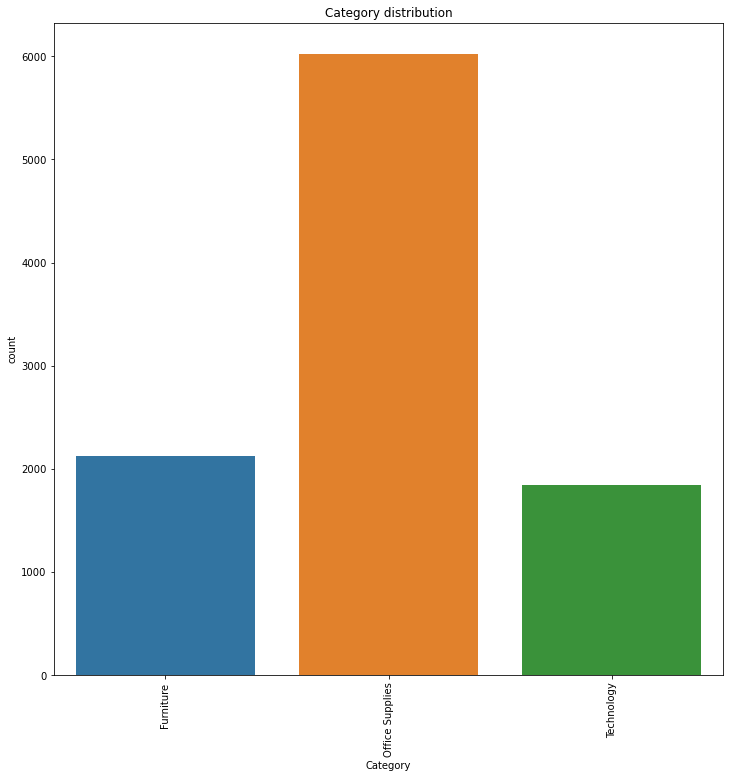

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


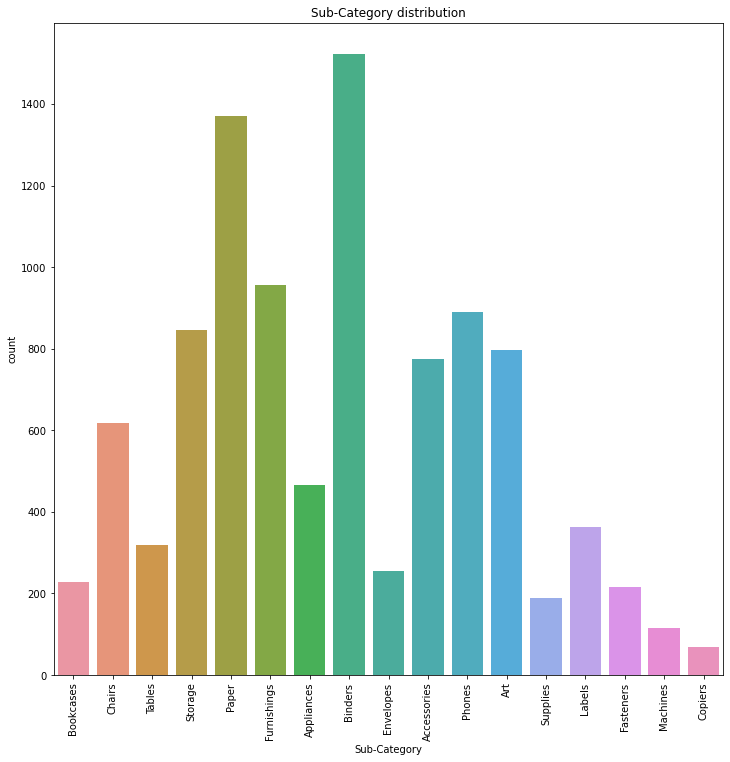

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


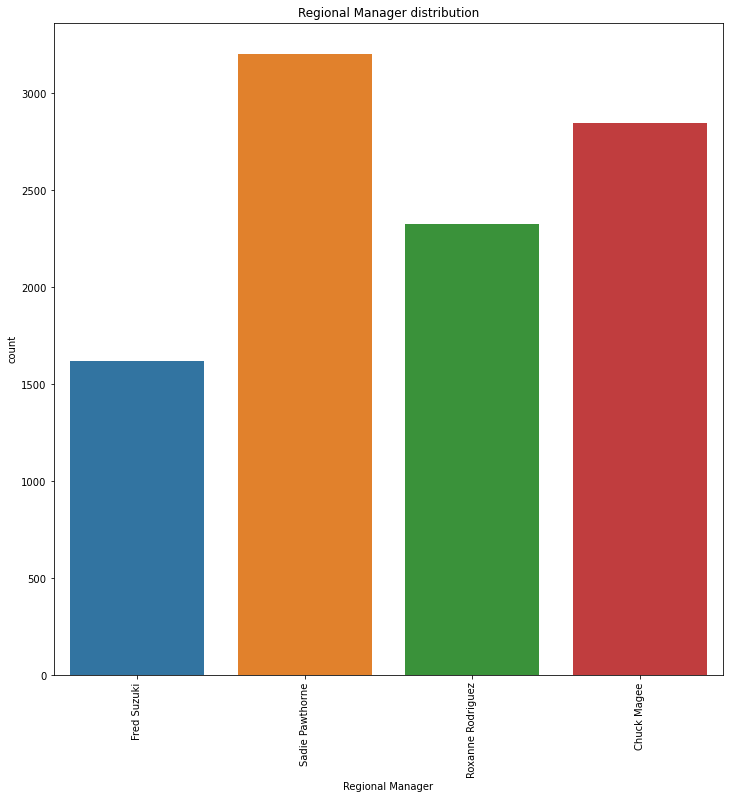

In [22]:
for i in categorical:
    univariate(i)

observations about number of transactions:
1. standard class is the leading ship mode
2. most customers are consumers
3. California state is leading by the number of transactions, then NewYork and Texas are the next states
4. Many transactions are occured in the West then East
5. Many customers are frequently consume office supplies than Furniture and Technology
6. binders and papers are the most frequently ordered subcategories.

In [23]:
def salesp(col):
    plt.figure(figsize=(14,20))
    sns.catplot(col,data=df_final,kind='bar',y='total sale')
    plt.title('{} distribution in Sales amount'.format(col))
    plt.xlabel(col)
    plt.ylabel('total sale')
    plt.xticks(rotation=90)
    plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1008x1440 with 0 Axes>

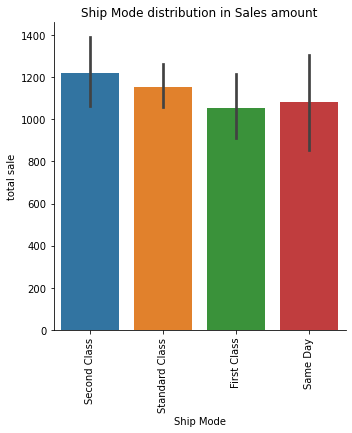

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1008x1440 with 0 Axes>

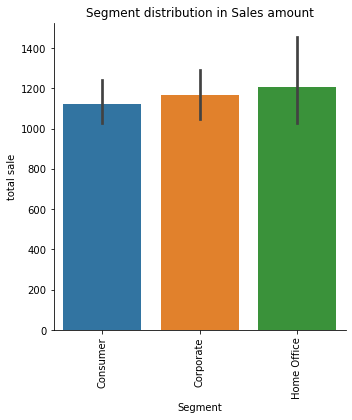

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1008x1440 with 0 Axes>

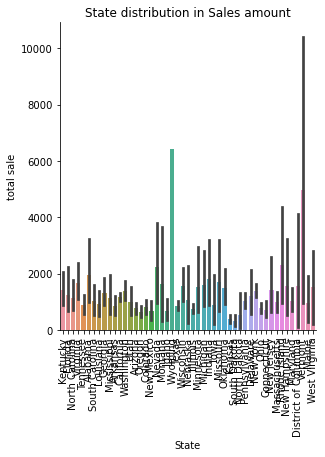

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1008x1440 with 0 Axes>

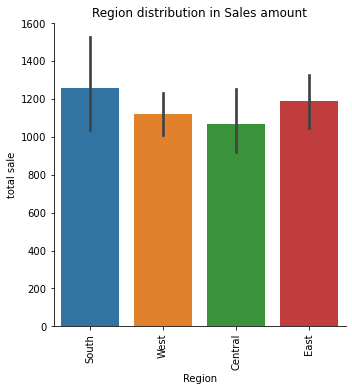

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1008x1440 with 0 Axes>

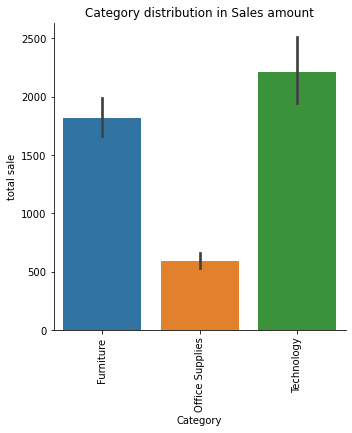

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1008x1440 with 0 Axes>

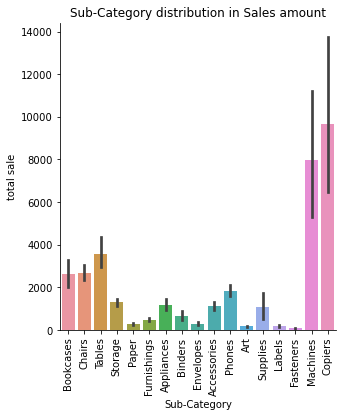

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1008x1440 with 0 Axes>

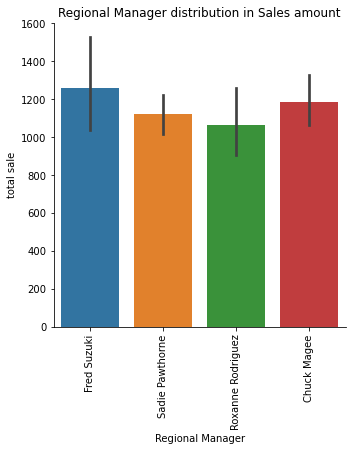

In [24]:
for i in categorical:
    salesp(i)

observation:
1. Machines and copies have high sales amount.
2. Techonlogies category has high sales price.

In [25]:
def sales_p(col):
    plt.figure(figsize=(12,12))
    sns.catplot(col,data=df_final,y='total sale')
    plt.title('{} distribution in sale'.format(col))
    plt.xlabel(col)
    plt.ylabel('total sale')
    plt.xticks(rotation=90)
    plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

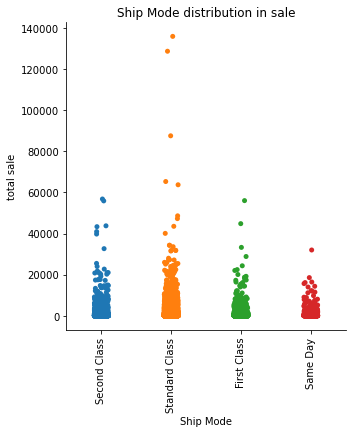

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

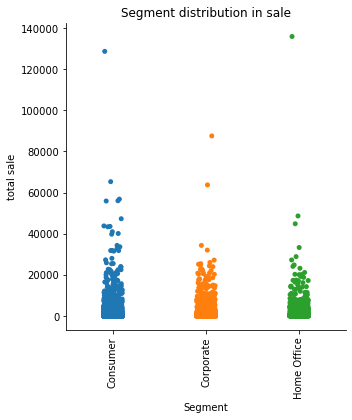

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

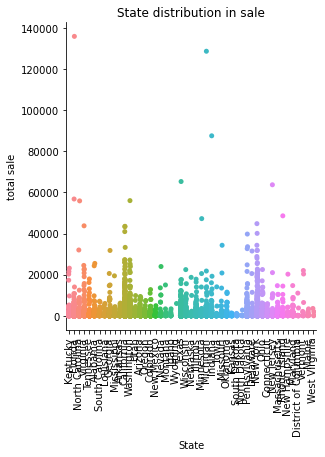

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

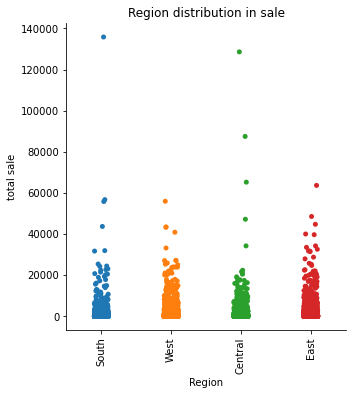

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

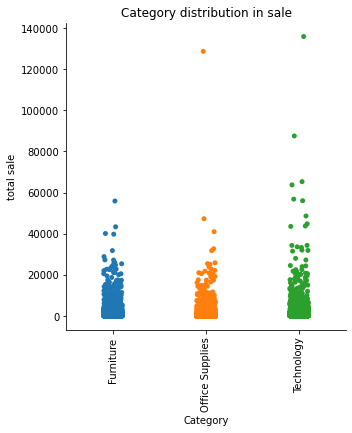

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

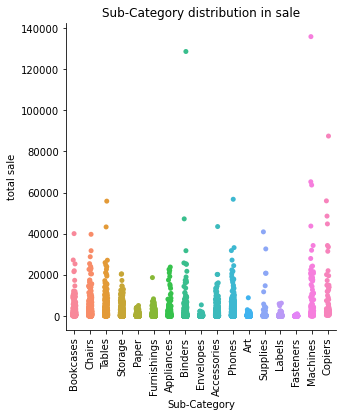

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

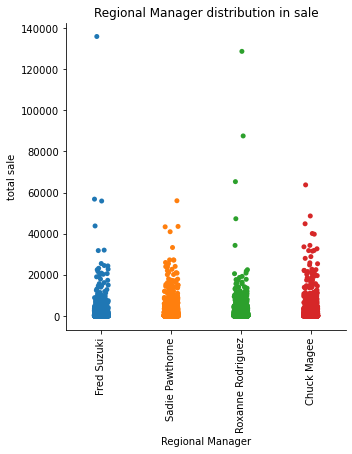

In [26]:
for i in categorical:
    sales_p(i)

observations:
1. totalsales is not that much for same day ship mode than others mode

In [27]:
def profit_scatter(col):
    plt.figure(figsize=(12,12))
    sns.catplot(col,data=df_final,y='Profit')
    plt.title('{} distribution in profit'.format(col))
    plt.xlabel(col)
    plt.ylabel('profit')
    plt.xticks(rotation=90)
    plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

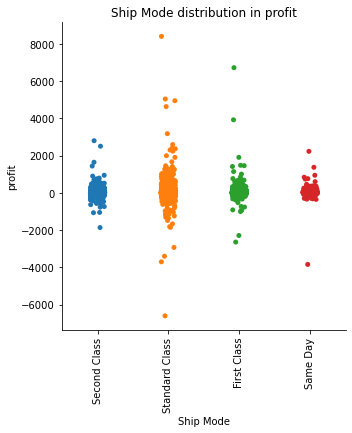

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

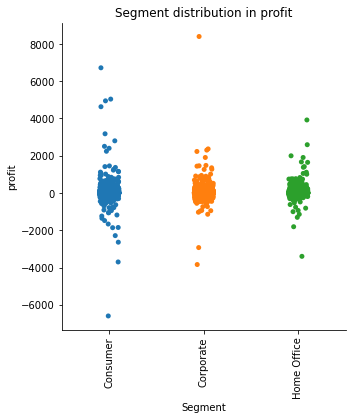

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

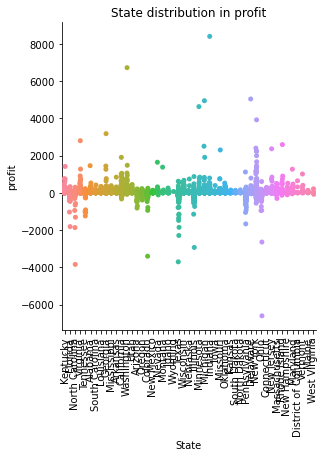

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

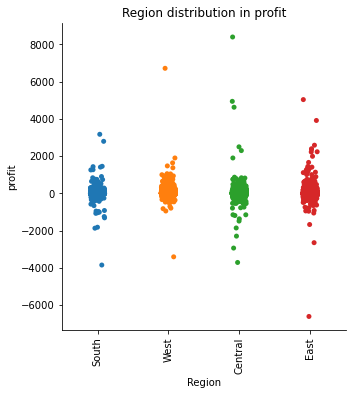

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

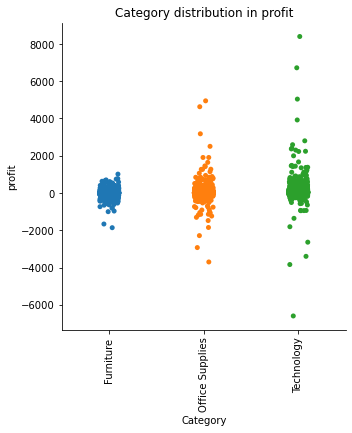

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

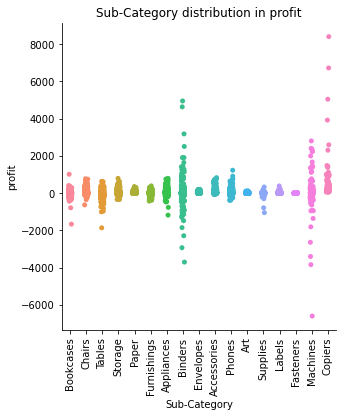

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

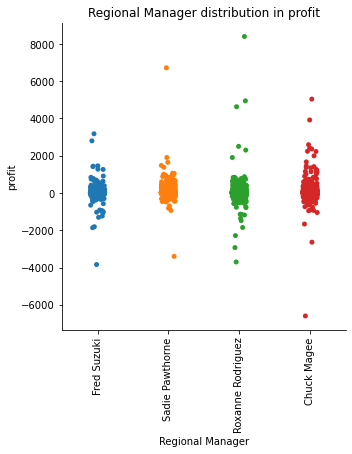

In [28]:
for i in categorical:
    profit_scatter(i)

observation:
1. mostly the profit is in range between -2000 and 2000 
2. West region is less in loss and profit distribution
3. loss and profit of Furniture is less, loss and profit of Technology is high
4. loss and profit of Corporate segment is less than others
5. loss and profit in Standard class ship mode is high.
6. in same ship mode loss is not that much occured (also the profit is not that much)
7. Cusumers' give more profit and loss.
8. copies doesn't lead to loss and the profit also best than others subcategory

In [29]:
categorical.remove('Category')

In [30]:
def qua(col):
    plt.figure(figsize=(12,12))
    sns.catplot(col,data=df_final,y='total sale',hue='Category',kind='bar')
    plt.title('{} distribution in sales by category'.format(col))
    plt.xlabel(col)
    plt.ylabel('total sale')
    plt.xticks(rotation=90)
    plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

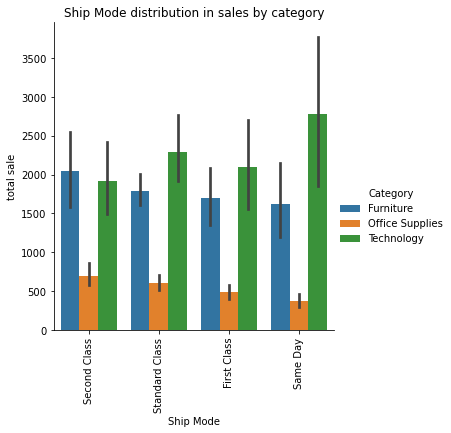

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

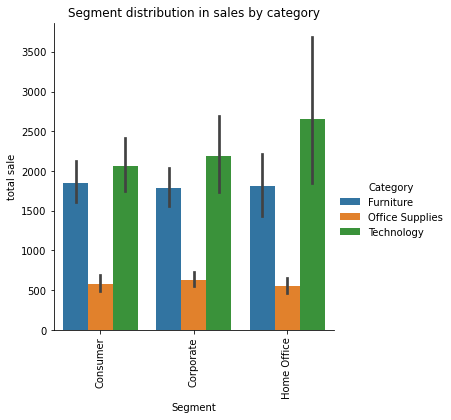

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

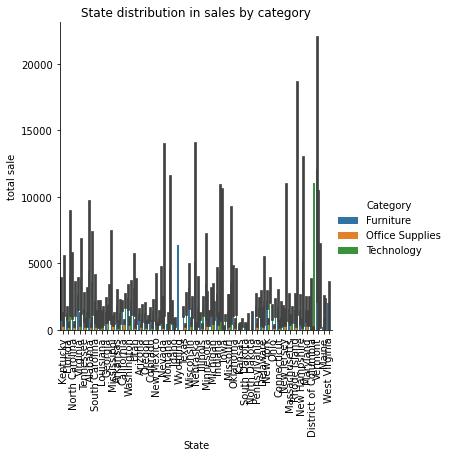

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

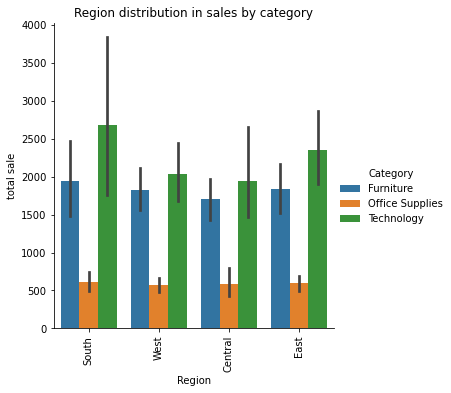

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

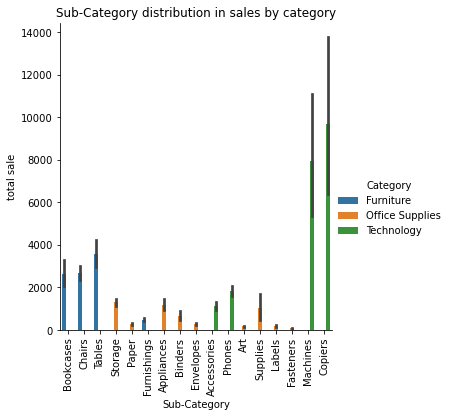

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

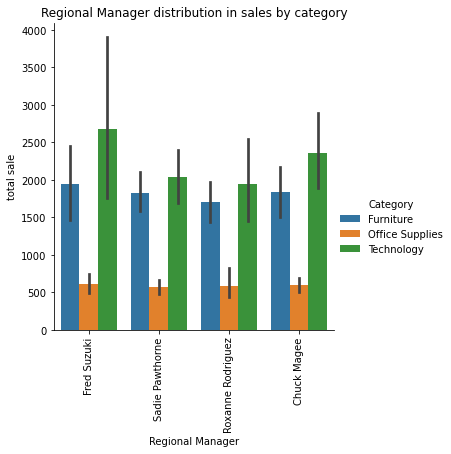

In [31]:
for i in categorical:
    qua(i)

observations:
1. in same day shipment mode the total sale of Technology is high. 
2. in same day shipment mode the order of Furniture and office supplies is high when compared with other mode. 
3. home office segments avg sales high in techology.
4. South and East technology sale is high, but almost equal by other categories.

In [32]:
def cate(col):
    plt.figure(figsize=(12,12))
    sns.countplot(col,data=df_final,hue='Category')
    plt.title('{} distribution by category'.format(col))
    plt.xlabel(col)
    plt.ylabel('number of transaction')
    plt.xticks(rotation=90)
    plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


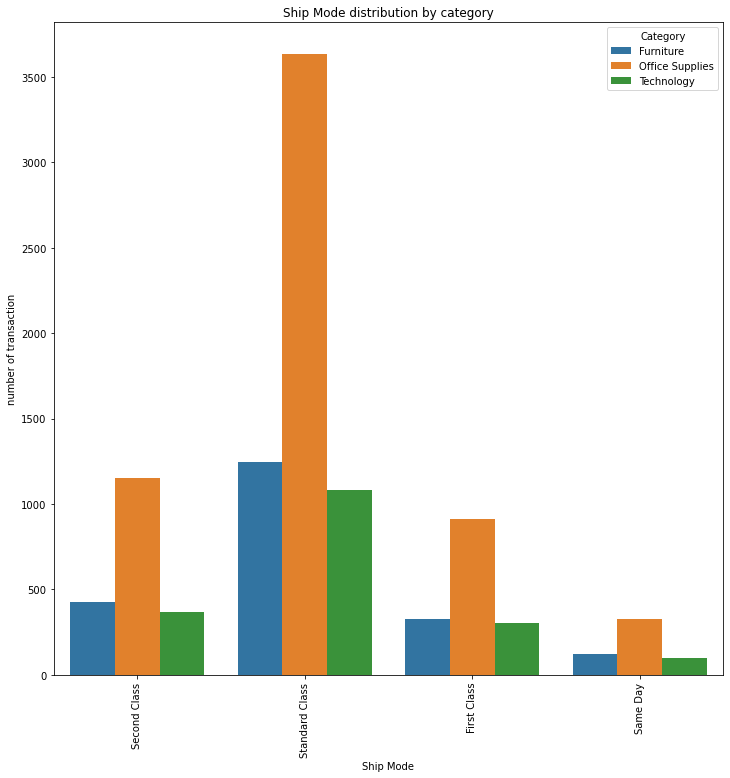

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


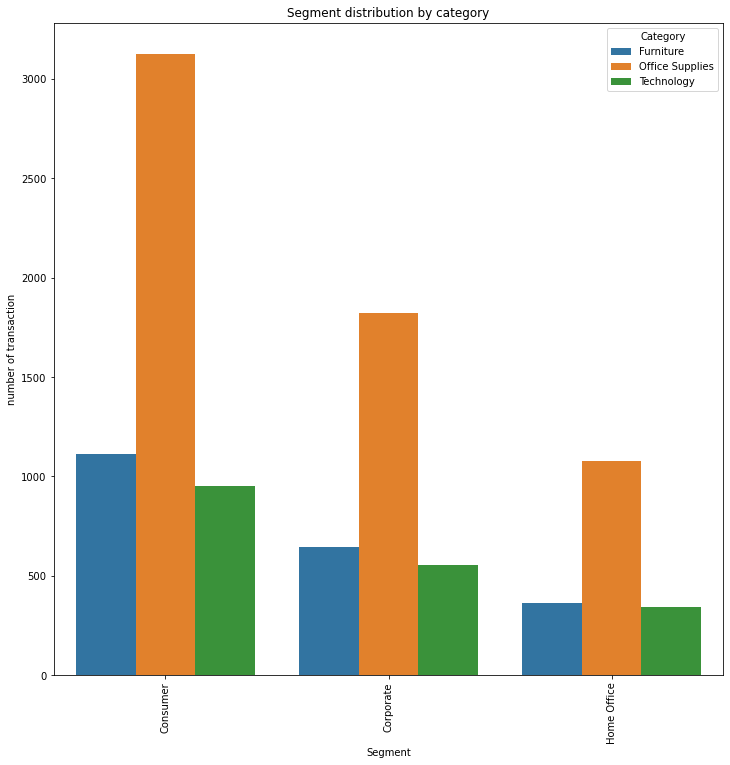

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


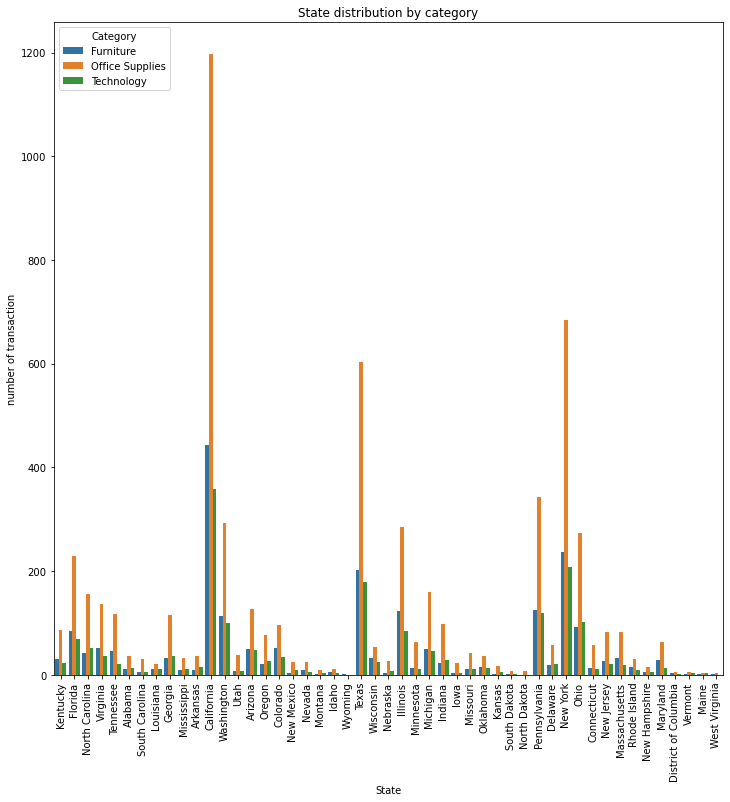

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


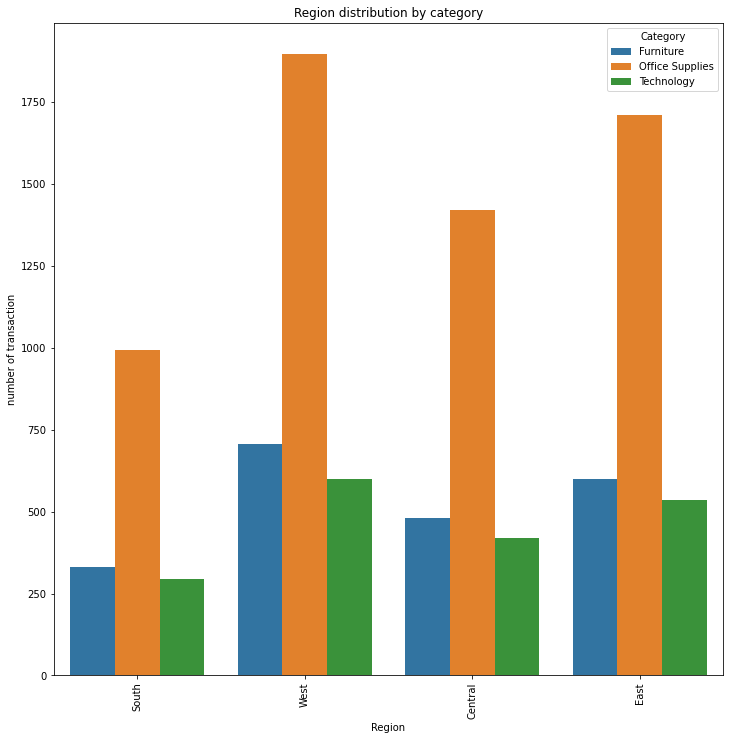

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


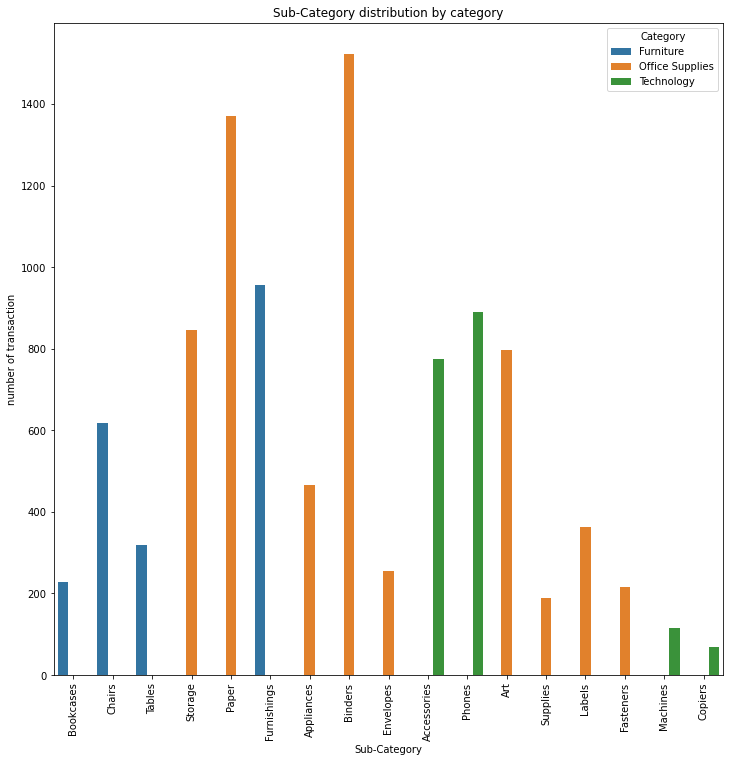

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


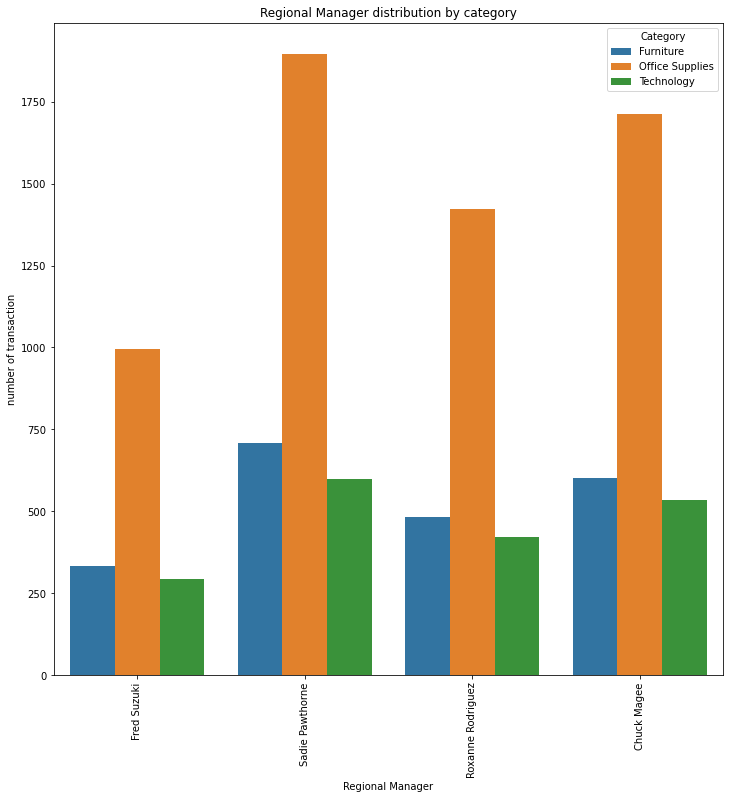

In [33]:
for i in categorical:
    cate(i)

1. standard class ship mode has many transactions in all categories than others ship modes.
2. Consumers are leading by ordering all categories than others.
3. California state is the leading state by all categories.
4. West regio is the leading region by order of all categories 
5. Binders, papers, furnishings, phones and storage are top 5 sub categories that are ordered frequently

In [34]:
df_final.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'total sale',
       'waiting(in days)', 'Regional Manager'],
      dtype='object')

In [35]:
def cate(col):
    plt.figure(figsize=(12,12))
    sns.catplot(col,data=df_final,hue='Category',y='waiting(in days)',kind='bar')
    plt.title('{} distribution by category'.format(col))
    plt.xlabel(col)
    plt.ylabel('waiting(in days)')
    plt.xticks(rotation=90)
    plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

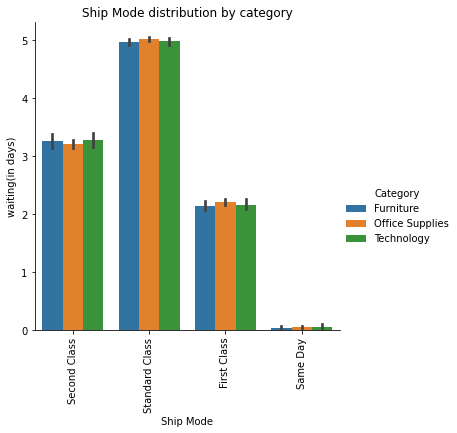

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

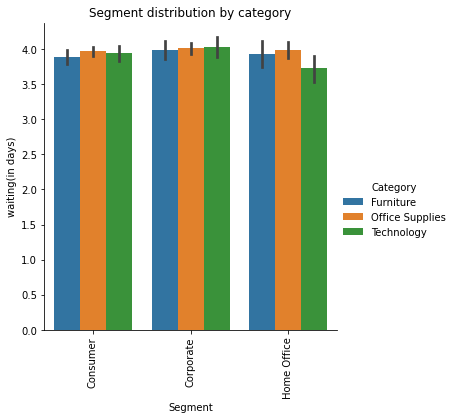

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

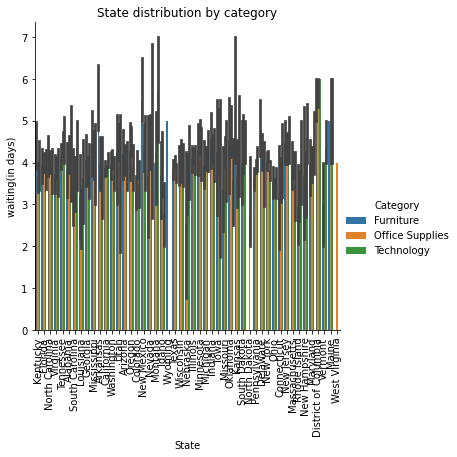

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

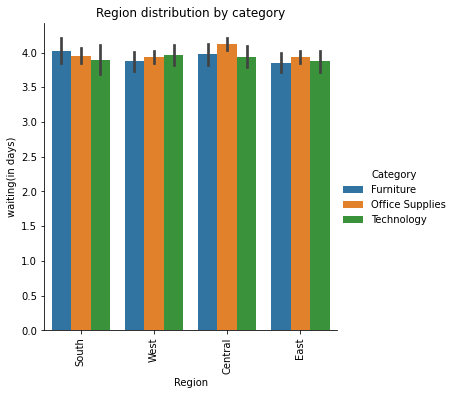

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

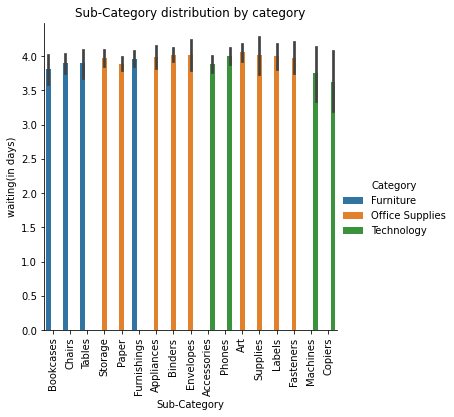

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x864 with 0 Axes>

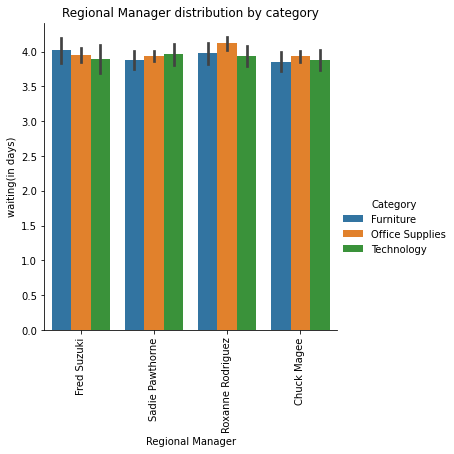

In [36]:
for i in categorical:
    cate(i)

observation:
1. same day ship mode delivery is fast (in average it is less than 0 days means within a day) irrespective of category
2. delivery days of standard class is maximum. irrespective of category
3. delivery of First class is within 2 days, and delivey days of second class is within 3 days. irrespective of category
4. average delivery for different customer segment is almost same (from 3.6 to 4.0 days)

In [37]:
def wait(col):
    plt.figure(figsize=(14,20))
    sns.catplot(col,data=df_final,y='waiting(in days)',kind='bar')
    plt.title('{} distribution by number of delivary days'.format(col))
    plt.xlabel(col)
    plt.ylabel('waiting(in days)')
    plt.xticks(rotation=90)
    plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1008x1440 with 0 Axes>

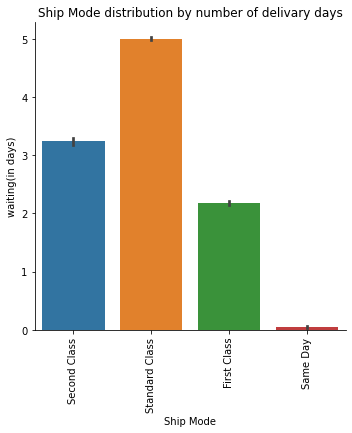

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1008x1440 with 0 Axes>

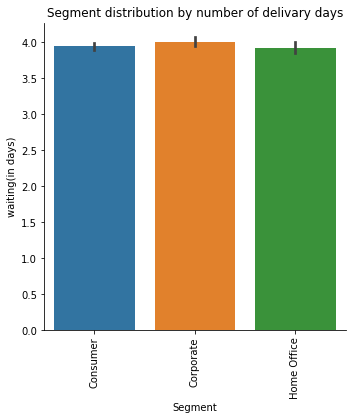

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1008x1440 with 0 Axes>

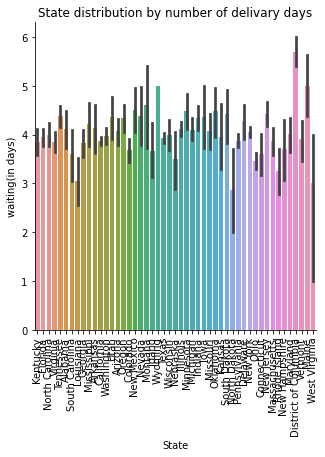

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1008x1440 with 0 Axes>

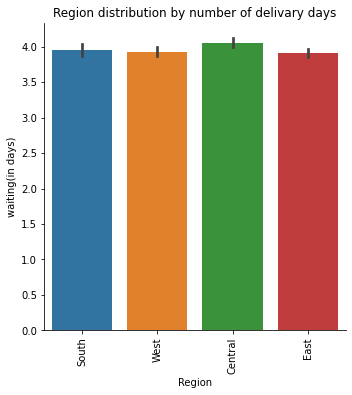

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1008x1440 with 0 Axes>

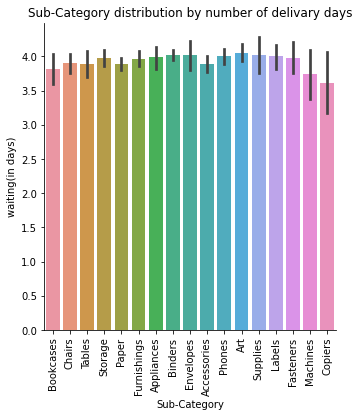

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1008x1440 with 0 Axes>

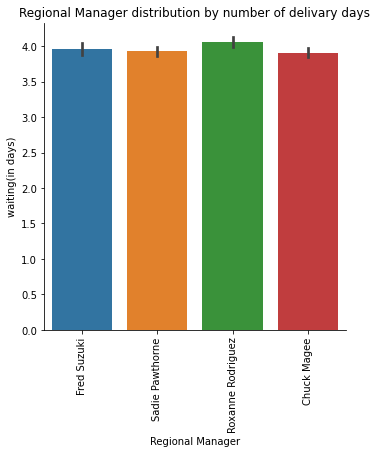

In [38]:
for i in categorical:
    wait(i)

([<matplotlib.patches.Wedge at 0x193804f1f10>,
 [Text(0.6696011572356373, 0.8727166150754182, 'New York City'),
  Text(-0.9315012523646876, 0.5850687283072123, 'Los Angeles'),
  Text(-0.8233056455897145, -0.7294983303202985, 'Philadelphia'),
  Text(0.2215501782627797, -1.077457896398616, 'San Francisco'),
  Text(1.0004911567962655, -0.4571842573541552, 'Seattle')],
 [Text(0.36523699485580213, 0.4760272445865917, '29.17%'),
  Text(-0.5080915921989205, 0.31912839725847947, '23.81%'),
  Text(-0.44907580668529884, -0.39790818017470825, '17.12%'),
  Text(0.12084555177969801, -0.5877043071265178, '16.26%'),
  Text(0.5457224491615994, -0.24937323128408462, '13.64%')])

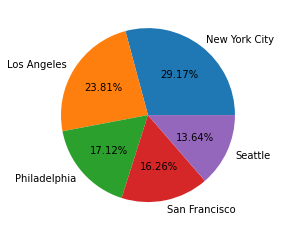

In [39]:
#looking top 5 cities
plt.pie(x=df_final['City'].value_counts().head(),labels=df_final['City'].value_counts().head().index,autopct=lambda x:f"{x:.2f}%")

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


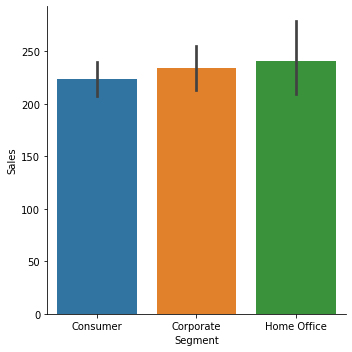

In [40]:
sns.catplot('Segment','Sales',data=df_final,kind='bar')

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


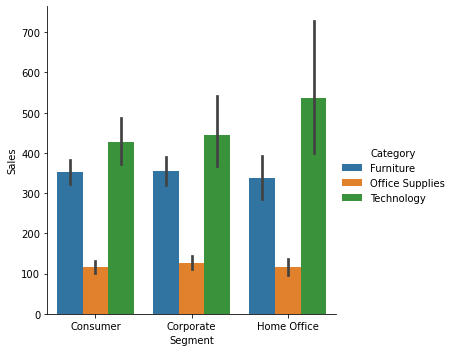

In [41]:
sns.catplot('Segment','Sales',data=df_final,kind='bar',hue='Category')

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


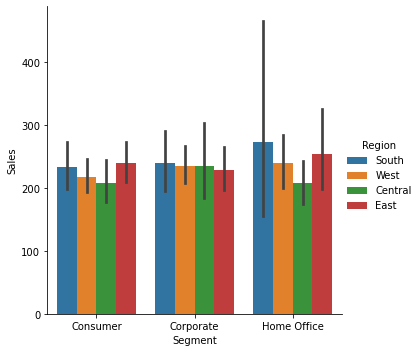

In [42]:
sns.catplot('Segment','Sales',data=df_final,kind='bar',hue='Region')

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


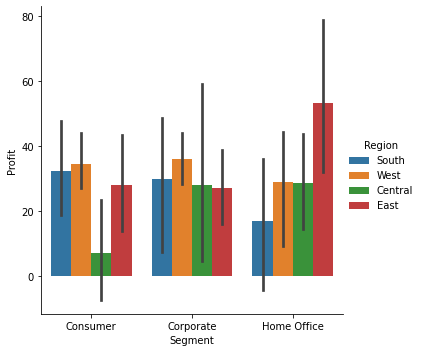

In [43]:
sns.catplot('Segment','Profit',data=df_final,kind='bar',hue='Region')

([<matplotlib.patches.Wedge at 0x19380ef0760>,
 [Text(0.6696011572356373, 0.8727166150754182, 'New York City'),
  Text(-0.9315012523646876, 0.5850687283072123, 'Los Angeles'),
  Text(-0.8233056455897145, -0.7294983303202985, 'Philadelphia'),
  Text(0.2215501782627797, -1.077457896398616, 'San Francisco'),
  Text(1.0004911567962655, -0.4571842573541552, 'Seattle')],
 [Text(0.36523699485580213, 0.4760272445865917, '29.17%'),
  Text(-0.5080915921989205, 0.31912839725847947, '23.81%'),
  Text(-0.44907580668529884, -0.39790818017470825, '17.12%'),
  Text(0.12084555177969801, -0.5877043071265178, '16.26%'),
  Text(0.5457224491615994, -0.24937323128408462, '13.64%')])

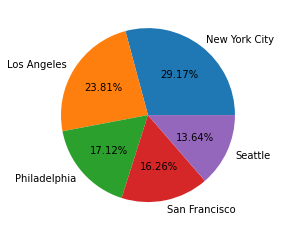

In [44]:
plt.pie(x=df['City'].value_counts().head(),labels=df['City'].value_counts().head().index,autopct=lambda x:f"{x:.2f}%")

observation:
1. top 5 cities by transactions are NewYork, Los Angeles,Phiadelphia,San Fransisco and Settle.

In [47]:
city=pd.pivot_table(df_final, values=['total sale','Profit','Quantity'], index=['City'], aggfunc=np.sum)
city.head()

,Profit,Quantity,total sale
City,,,
Aberdeen,6.6300,3,76.50
Abilene,-3.7584,2,2.78
Akron,-186.6356,65,7188.79
Albuquerque,634.0881,65,11668.99
Alexandria,318.6183,84,31150.49


In [48]:
city=city.sort_values(by='total sale',ascending=False)
city.reset_index(inplace=True)
city.head()

,City,Profit,Quantity,total sale
0,New York City,62036.9837,3417,1263477.79
1,Los Angeles,30440.7579,2879,873209.45
2,Seattle,29156.0967,1590,597615.32
3,Philadelphia,-13837.7674,1981,567774.05
4,San Francisco,17507.3854,1935,541425.78


([<matplotlib.patches.Wedge at 0x1938033bfa0>,
 [Text(0.5637161928281272, 0.9445761239536822, 'New York City'),
  Text(-1.0285636833222642, 0.38994454650698357, 'Los Angeles'),
  Text(-0.734335887369736, -0.8189937756301343, 'Seattle'),
  Text(0.24178279085177043, -1.0730988221258697, 'Philadelphia'),
  Text(0.994029213040993, -0.47106891599967005, 'San Francisco')],
 [Text(0.307481559724433, 0.515223340338372, '32.87%'),
  Text(-0.5610347363575986, 0.21269702536744559, '22.72%'),
  Text(-0.40054684765621956, -0.44672387761643684, '15.55%'),
  Text(0.13188152228278385, -0.5853266302504744, '14.77%'),
  Text(0.5421977525678143, -0.25694668145436544, '14.09%')])

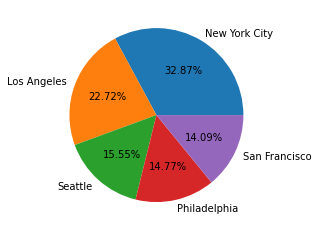

In [49]:
plt.pie(x=city['total sale'].head(),labels=city['City'].head(),autopct=lambda x:f"{x:.2f}%")

observation:
1. New York City,Los Angeles,Seattle,Philadelphia, and San Francisco are th top 5 cities by total sales

In [50]:
city=city.sort_values(by='Profit',ascending=False)
city.head()

,City,Profit,Quantity,total sale
0,New York City,62036.9837,3417,1263477.79
1,Los Angeles,30440.7579,2879,873209.45
2,Seattle,29156.0967,1590,597615.32
4,San Francisco,17507.3854,1935,541425.78
6,Detroit,13181.7908,441,270415.31


([<matplotlib.patches.Wedge at 0x1938038b820>,
 [Text(0.315930090075189, 1.0536546769151092, 'New York City'),
  Text(-1.0988763842269704, -0.049706057862795555, 'Los Angeles'),
  Text(-0.32132465402677435, -1.052022084708574, 'Seattle'),
  Text(0.6796105232038404, -0.8649448171707849, 'San Francisco'),
  Text(1.059597747659042, -0.2953855330849592, 'Detroit')],
 [Text(0.1723255036773758, 0.5747207328627868, '40.73%'),
  Text(-0.5993871186692565, -0.02711239519788848, '19.98%'),
  Text(-0.17526799310551325, -0.5738302280228584, '19.14%'),
  Text(0.37069664902027655, -0.4717880820931553, '11.49%'),
  Text(0.5779624078140227, -0.161119381682705, '8.65%')])

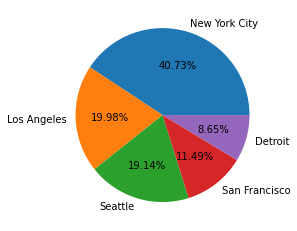

In [51]:
plt.pie(x=city['Profit'].head(),labels=city['City'].head(),autopct=lambda x:f"{x:.2f}%")

observation:
list of top 5 cities by profit are
1. New York City
2. Los Angeles
3. Seattle
4. San Francisco
5. Detroit

In [52]:
city=city.sort_values(by='Quantity',ascending=False)
city.head()

,City,Profit,Quantity,total sale
0,New York City,62036.9837,3417,1263477.79
1,Los Angeles,30440.7579,2879,873209.45
3,Philadelphia,-13837.7674,1981,567774.05
4,San Francisco,17507.3854,1935,541425.78
2,Seattle,29156.0967,1590,597615.32


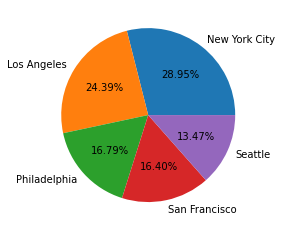

In [53]:
plt.pie(x=city['Quantity'].head(),labels=city['City'].head(),autopct=lambda x:f"{x:.2f}%")
plt.show()

observation:
top 5 cities by order of quantity
1. New York
2. Los Angeles
3. Philadelphia
4. San Francisco
5. Seattle

In [54]:
# looking in which city and state we get maximum loss
df[df['Profit']==df['Profit'].min()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,total sale,waiting(in days)
7772,CA-2020-108196,2020-11-25,2020-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,Ohio,43130,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.978,22499.93,7


In [55]:
!pip install pyshp

In [56]:
import shapefile as shp

#### Numerical Analysis

<AxesSubplot:xlabel='Quantity', ylabel='Count'>

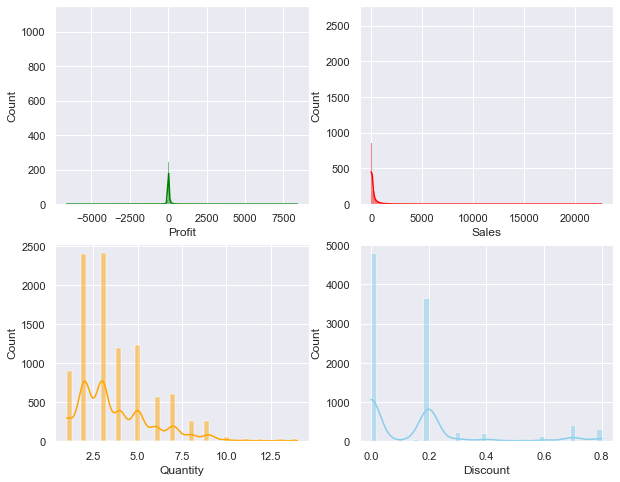

In [57]:
# numerical analysis
#looking distribution of numerical values
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x='Profit',kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x='Sales',kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x='Discount',kde=True,ax=axs[1,1],color='skyblue')
sns.histplot(data=df,x='Quantity',kde=True,ax=axs[1,0],color='orange')

pearsons correlation between profit and quantity is 0.06625318912428507


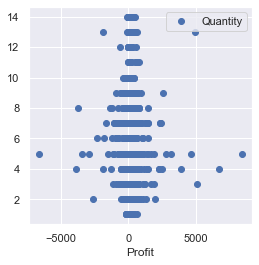

In [58]:
# correlation
df_final.plot('Profit','Quantity',style='o')
print('pearsons correlation between profit and quantity is {}'.format(df_final['Quantity'].corr(df_final['Profit'])) )

pearsons correlation between sales and discount is -0.028190124157535586


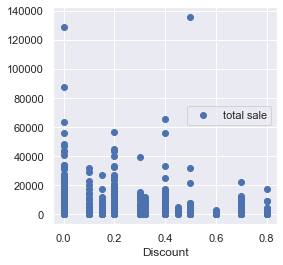

In [59]:
# looking correlation
df_final.plot('Discount','total sale',style='o')
print('pearsons correlation between sales and discount is {}'.format(df_final['Sales'].corr(df_final['Discount'])) )

pearsons correlation between discount and profit is -0.21948745637176884


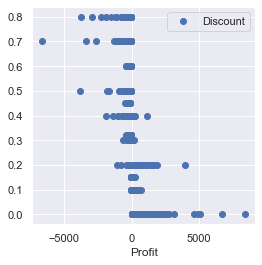

In [60]:
# looking correlation
df_final.plot('Profit','Discount',style='o')
print('pearsons correlation between discount and profit is {}'.format(df_final['Discount'].corr(df_final['Profit'])) )

In [61]:
df_final.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'total sale',
       'waiting(in days)', 'Regional Manager'],
      dtype='object')

pearsons correlation between waiting(in days) and sales is -0.002582222983467656


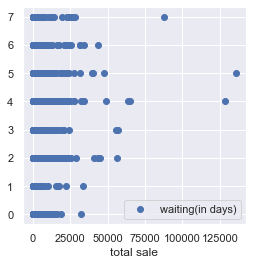

In [62]:

df_final.plot('total sale','waiting(in days)',style='o')
print('pearsons correlation between waiting(in days) and sales is {}'.format(df_final['total sale'].corr(df_final['waiting(in days)'])) )

pearsons correlation between waiting(in days) and profit is -0.004654238540263412


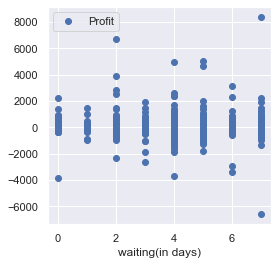

In [63]:

df_final.plot('waiting(in days)','Profit',style='o')
print('pearsons correlation between waiting(in days) and profit is {}'.format(df_final['waiting(in days)'].corr(df_final['Profit'])) )

pearsons correlation between quantity and sales is 0.33101485086848303


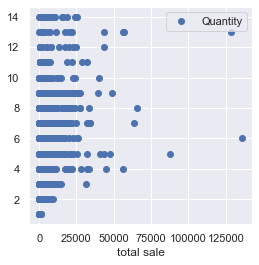

In [64]:

df_final.plot('total sale','Quantity',style='o')
print('pearsons correlation between quantity and sales is {}'.format(df_final['total sale'].corr(df_final['Quantity'])) )

observation:
1. total sales and quantity are moderate positively correlated.
2. discount and profit are slight negatively corelated.


In [65]:
## drop index
df.reset_index(drop=True)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,total sale,waiting(in days)
0,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.92,3
1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.82,3
2,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.24,4
3,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4787.89,7
4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,44.74,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2018-110422,2018-01-21,2018-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,75.74,2
9990,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,183.92,5
9991,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,517.15,5
9992,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,118.40,5


#### time series analysis

to perform time series analysis
1. the index must be Datetime column
2. use resample and rolling technique
3. use line chart

In [66]:
df_final.set_index('Order Date',inplace=True)
df_final.head()

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,total sale,waiting(in days),Regional Manager
Order Date,,,,,,,,,,,,,,,,,,,,,,
2020-11-08,CA-2020-152156,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.92,3,Fred Suzuki
2020-11-08,CA-2020-152156,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.82,3,Fred Suzuki
2019-10-11,US-2019-108966,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4787.89,7,Fred Suzuki
2019-10-11,US-2019-108966,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,44.74,7,Fred Suzuki
2021-04-15,CA-2021-114412,2021-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520,3,0.20,5.4432,46.66,5,Fred Suzuki


<AxesSubplot:xlabel='Order Date'>

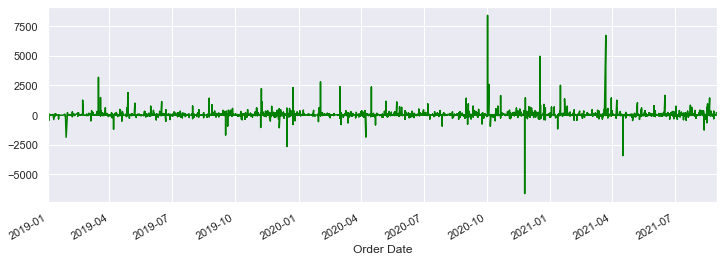

In [67]:
df_final['Profit'].plot(xlim=['2019-01-01','2021-09-01'],figsize=(12,4),c='green')

In [68]:
index=df_final.loc['2020-01-01':'2020-01-31'].index
profits=df_final.loc['2020-01-01':'2020-01-31']['Profit']

C:\Users\KIIT\AppData\Local\Temp/ipykernel_65584/404218905.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  index=df_final.loc['2020-01-01':'2020-01-31'].index
C:\Users\KIIT\AppData\Local\Temp/ipykernel_65584/404218905.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  profits=df_final.loc['2020-01-01':'2020-01-31']['Profit']


<Figure size 720x576 with 0 Axes>

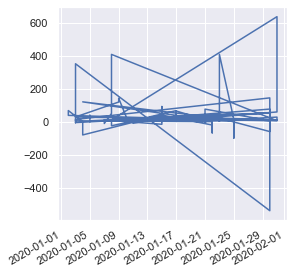

In [69]:
plt.figure(figsize=(10,8))
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,profits)

In [70]:
# time resampling
#1. rule A -> at the end of each year
#2. rule QS -> at start date of quarter
#3. BA Business End Frequency
#4. W : weekly frequency
#5. M : month end frequency
#6. SM : semi-month end frequency (15th and end of month)
#6. Q : quarter end frequency

##### Yearly Analysis

In [71]:
# looking min, max, and mean at the end of each year
df_final[['total sale','Discount','Profit','Quantity','Sales']].resample(rule='A').min()

,total sale,Discount,Profit,Quantity,Sales
Order Date,,,,,
2018-12-31,0.85,0.0,-3701.8928,1,0.852
2019-12-31,1.24,0.0,-2639.9912,1,0.984
2020-12-31,0.84,0.0,-6599.9780,1,0.836
2021-12-31,0.44,0.0,-3839.9904,1,0.444


Text(0.5, 1.0, 'min profit in years')

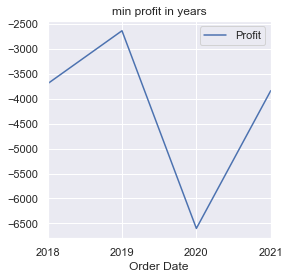

In [72]:
df_final[['Profit']].resample(rule='A').min().plot()
plt.title('min profit in years')

Text(0.5, 1.0, 'min total sale in years')

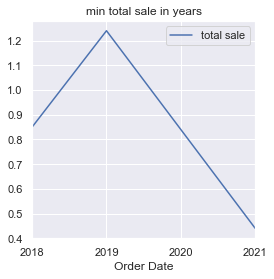

In [73]:
df_final[['total sale']].resample(rule='A').min().plot()
plt.title('min total sale in years')

In [74]:
df_final[['total sale','Quantity','Discount','Profit']].resample(rule='A').mean()

,total sale,Quantity,Discount,Profit
Order Date,,,,
2018-12-31,1238.476744,3.803813,0.158284,24.858994
2019-12-31,1134.586984,3.795909,0.155609,29.314274
2020-12-31,1178.994121,3.802474,0.154743,31.617771
2021-12-31,1082.373261,3.766908,0.156467,28.212340


Text(0.5, 1.0, 'avg discount in years')

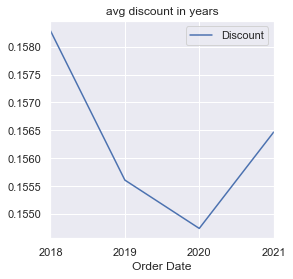

In [75]:
df_final[['Discount']].resample(rule='A').mean().plot()
plt.title('avg discount in years')

Text(0.5, 1.0, 'avg profit in years')

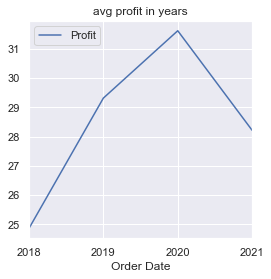

In [76]:
df_final[['Profit']].resample(rule='A').mean().plot()
plt.title('avg profit in years')

Text(0.5, 1.0, 'avg total sale in years')

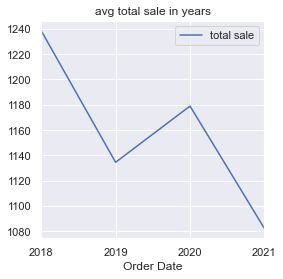

In [77]:
df_final[['total sale']].resample(rule='A').mean().plot()
plt.title('avg total sale in years')

In [78]:
df_final[['total sale','Discount','Profit']].resample(rule='A').sum()

,total sale,Discount,Profit
Order Date,,,
2018-12-31,2468284.15,315.46,49543.9741
2019-12-31,2384901.84,327.09,61618.6037
2020-12-31,3050057.79,400.32,81795.1743
2021-12-31,3584820.24,518.22,93439.2696


Text(0.5, 1.0, 'sum of total sales in years')

<Figure size 720x576 with 0 Axes>

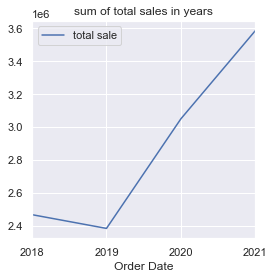

In [79]:
plt.figure(figsize=(10,8))
df_final[['total sale']].resample(rule='A').sum().plot()
plt.title('sum of total sales in years')

Text(0.5, 1.0, 'total profit in years')

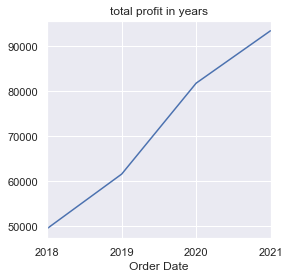

In [80]:
df_final['Profit'].resample(rule='A').sum().plot()
plt.title('total profit in years')

1. avg total sale was high on 2018 and low in 2021
2. the avg profit was increasing until 2020, but on 2021 it is decreasing (less than 2019)
3. minimum total sale was increasing from 2018 to 2019 but after 2019 it was decreasing 
4. minimum profit from 2018 to 2019 was increasing (it was good), but from 2019 to 2020 it was decreasing (not good) and 2021 it was increasing
5. total sales was decreasing from 2018 to 2019 but from 2019 to 2021 there is amazing increasment seen.
6. total sales was increasing from 2018 to 2019

<AxesSubplot:xlabel='Order Date'>

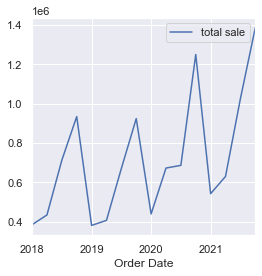

In [81]:
df_final.resample(rule='Q').sum()[['total sale']].plot()

observation:
1. on the 4th quarter of each year the total sale is increasing than the previous 3 quarters 

Text(0.5, 1.0, 'order of product in quarters')

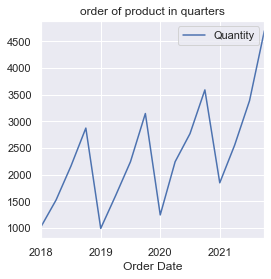

In [83]:
df_final.resample(rule='Q').sum()[['Quantity']].plot()
plt.title('order of product in quarters')

observation:
1. total quantity of ordered product is increasing on the 4th quarter of each year

Text(0.5, 1.0, 'profit in quarters')

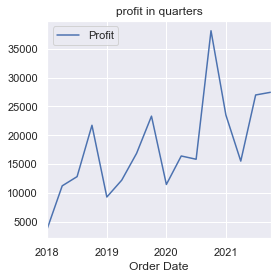

In [84]:
df_final.resample(rule='Q').sum()[['Profit']].plot()
plt.title('profit in quarters')

observation:
1. on each year at the 4th quarter the profit is increasing except 2021

Text(0.5, 1.0, 'discount in quarters')

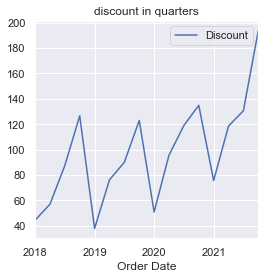

In [85]:
df_final.resample(rule='Q').sum()[['Discount']].plot()
plt.title('discount in quarters')

observation:
 1. on the 4th qurter of each year discount is increasing 

Text(0.5, 1.0, 'sale price in quarters')

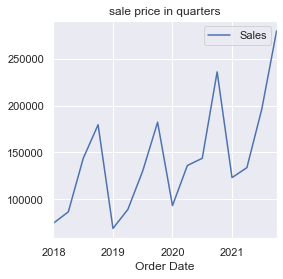

In [86]:
df_final.resample(rule='Q').sum()[['Sales']].plot()
plt.title('sale price in quarters')

In [87]:
df_final['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [88]:
furniture=df_final[df_final['Category']=='Furniture']
office=df_final[df_final['Category']=='Office Supplies']
tech=df_final[df_final['Category']=='Technology']

In [89]:
furniture[['total sale','Quantity','Profit']].resample(rule='A').sum()

,total sale,Quantity,Profit
Order Date,,,
2018-12-31,854458.94,1623,5457.7255
2019-12-31,949214.58,1775,3015.2029
2020-12-31,981799.84,2193,6959.9531
2021-12-31,1073742.12,2437,3018.3913


Text(0.5, 1.0, 'total sale for furniture in each year')

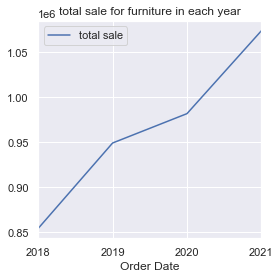

In [90]:
furniture[['total sale']].resample(rule='A').sum().plot()
plt.title('total sale for furniture in each year')

Text(0.5, 1.0, 'profit for funiture category in each year')

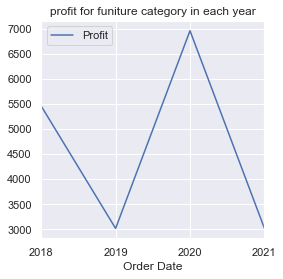

In [91]:
furniture[['Profit']].resample(rule='A').sum().plot()
plt.title('profit for funiture category in each year')

Text(0.5, 1.0, 'quantity for furniture in each year')

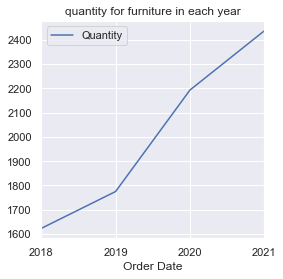

In [92]:
furniture[['Quantity']].resample(rule='A').sum().plot()
plt.title('quantity for furniture in each year')

Text(0.5, 1.0, 'Sales for furniture in each year')

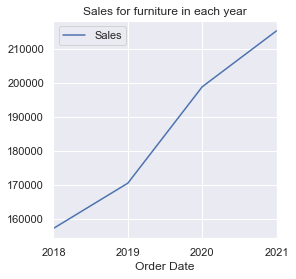

In [93]:
furniture[['Sales']].resample(rule='A').sum().plot()
plt.title('Sales for furniture in each year')

Text(0.5, 1.0, 'discount for furniture in each year')

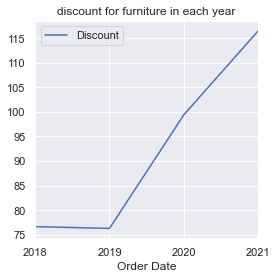

In [94]:
furniture[['Discount']].resample(rule='A').sum().plot()
plt.title('discount for furniture in each year')

Text(0.5, 1.0, 'delivery for furniture in each year')

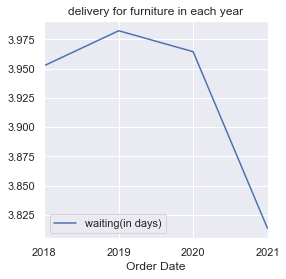

In [95]:
furniture[['waiting(in days)']].resample(rule='A').mean().plot()
plt.title('delivery for furniture in each year')

observation: for furniture category
1. the discount of furniture is increasing from year to year
2. the sold quantity was increasing from year to year 
3. the profit was decreasing from 2018 to 2019, then increased from 2019 to 2020 and from 2020-2021 decreased (2020 was the year which the profit reached high)
4. year to year total sale was increasing 
5. waiting days for delivary was high on 2019, it was increasing from 2018 to 2019, but after that it was decreasing

Text(0.5, 1.0, 'Sales for furniture in each year')

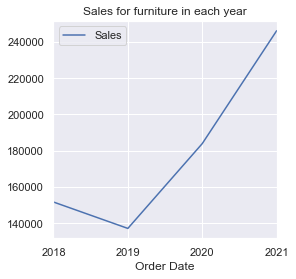

In [96]:
office[['Sales']].resample(rule='A').sum().plot()
plt.title('Sales for furniture in each year')

Text(0.5, 1.0, 'total sale for office supplies in each year')

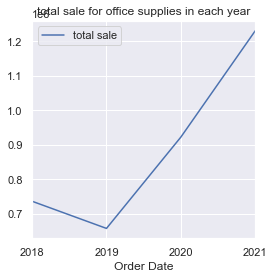

In [97]:
office[['total sale']].resample(rule='A').sum().plot()
plt.title('total sale for office supplies in each year')

Text(0.5, 1.0, 'profit for office supplies in each year')

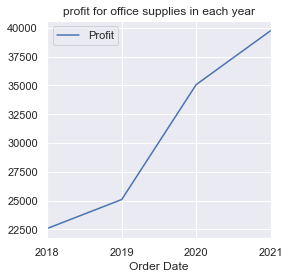

In [98]:
office[['Profit']].resample(rule='A').sum().plot()
plt.title('profit for office supplies in each year')

Text(0.5, 1.0, 'quantity for office supplies in each year')

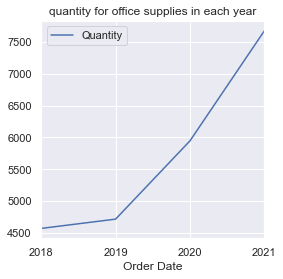

In [99]:
office[['Quantity']].resample(rule='A').sum().plot()
plt.title('quantity for office supplies in each year')

Text(0.5, 1.0, 'discount for office supplies in each year')

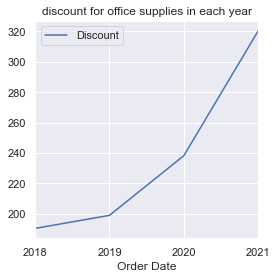

In [100]:
office[['Discount']].resample(rule='A').sum().plot()
plt.title('discount for office supplies in each year')

Text(0.5, 1.0, 'delivary for furniture in each year')

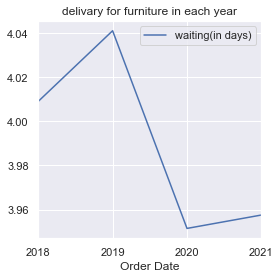

In [101]:
office[['waiting(in days)']].resample(rule='A').mean().plot()
plt.title('delivary for furniture in each year')

observation: office supplies
1. sales price was decreasing from 2018-2019 but after 2019 it was increasing
2. total sales was decreasing from 2018-2019 but after that it was increasing
3. profit, discount and quantity (number of order) were increasing from year to year
4. delivary days of product was increasing from 2018-2019 and 2020-21 and from 2019-20 it was decreasing

Text(0.5, 1.0, 'profit for technology in each year')

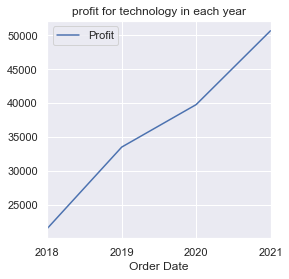

In [102]:
tech[['Profit']].resample(rule='A').sum().plot()
plt.title('profit for technology in each year')

Text(0.5, 1.0, 'quzntity for technology in each year')

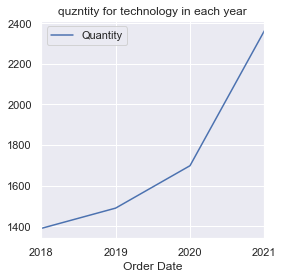

In [103]:
tech[['Quantity']].resample(rule='A').sum().plot()
plt.title('quzntity for technology in each year')

Text(0.5, 1.0, 'total sale for technology in each year')

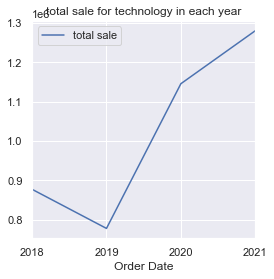

In [104]:
tech[['total sale']].resample(rule='A').sum().plot()
plt.title('total sale for technology in each year')

Text(0.5, 1.0, 'sales for technology in each year')

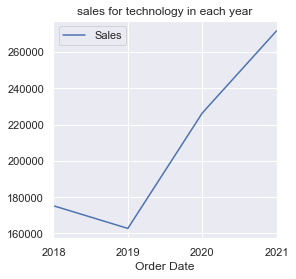

In [105]:
tech[['Sales']].resample(rule='A').sum().plot()
plt.title('sales for technology in each year')

Text(0.5, 1.0, 'discount for technology in each year')

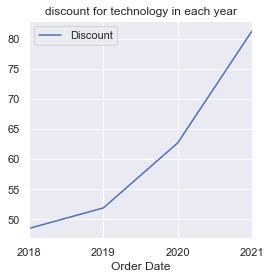

In [106]:
tech[['Discount']].resample(rule='A').sum().plot()
plt.title('discount for technology in each year')

Text(0.5, 1.0, 'delivary for furniture in each year')

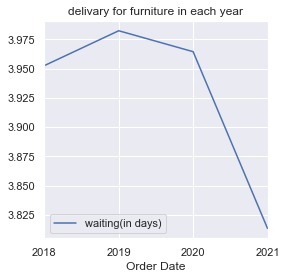

In [107]:
furniture[['waiting(in days)']].resample(rule='A').mean().plot()
plt.title('delivary for furniture in each year')

observations: technology category
1. the discount is less when we compare from other category, but it was increasing year to year
2. sale price for each indvidual was decreasing from 2018 to 2019, but after that it was increasing
3. the sold quantity also increasing from year to year 
4. the profit also on increasing
5. total sales was decreasing from 2018 to 2019 but after 2019 it was increasing
6. avg delivary days was increasing from 2018 to 2019 but after that it was decreasing

<AxesSubplot:xlabel='Order Date'>

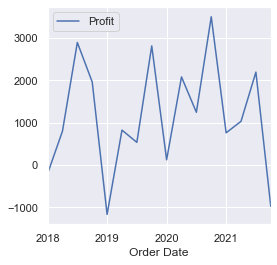

In [108]:
furniture[['Profit']].resample(rule='Q').sum().plot()

observation:
1. on the 1st quarter of 2019 and on the 4th quarter of 2021 the profit reached the minimum (loss)
2. on the 4th quarter of 2020 the profit was reaached the maximum (>3000), on the 3rd quarter of 2018 and on the 4th quarter of 2020 (almost 3000)


<AxesSubplot:xlabel='Order Date'>

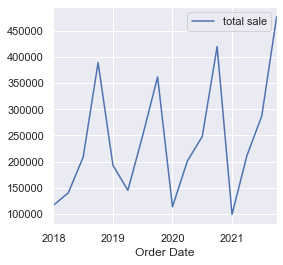

In [109]:
furniture.resample(rule='Q').sum()[['total sale']].plot()

observation:
1. totalsale gets maximum on the 4th quarter of 2021
2. totalsale reached minimum on the 1st quarter of 2021 and first quarter of 2020 and first quarter of 2018
3. on the first quarter of each year the totalsales decreased when compared with the other quarter in the same year
4. on the 4th quarter of each year the totalsales increased when compared to other quarter with in the sampe year

In [110]:
furniture.resample(rule='Q').sum()[['Quantity']]

,Quantity
Order Date,
2018-03-31,224
2018-06-30,300
2018-09-30,429
2018-12-31,670
2019-03-31,244
2019-06-30,345
2019-09-30,479
2019-12-31,707
2020-03-31,332


<AxesSubplot:xlabel='Order Date'>

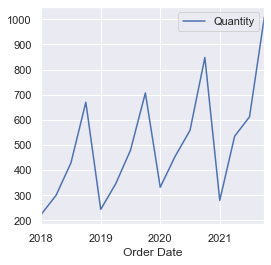

In [111]:
furniture.resample(rule='Q').sum()[['Quantity']].plot()

observation:
1. quantity gets maximum on the 4th quarter of 2021
2. quantity reached minimum on the 1st quarter of 2021 and first quarter of 2020 and first quarter of 2018
3. on the first quarter of each year the quantity decreased when compared with the other quarter in the same year
4. on the 4th quarter of each year the quantity increased when compared to other quarter with in the sampe year

<AxesSubplot:xlabel='Order Date'>

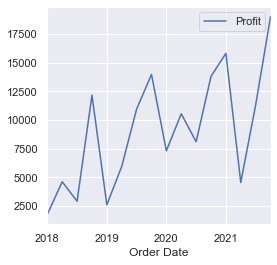

In [112]:
tech[['Profit']].resample(rule='Q').sum().plot()

observation:
1. the profit is increased on each year at 4th quarter
2. the profit reached at maximum on 4th quarter of 2021
3. the profit reached at minimum on the 1st quarter,3rd quarter of 2018 and 1st quarter of 2019

<AxesSubplot:xlabel='Order Date'>

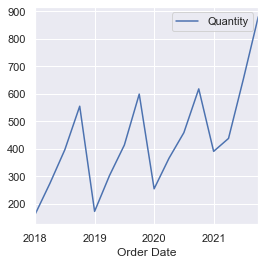

In [113]:
tech[['Quantity']].resample(rule='Q').sum().plot()

observation:
1. the ordered product is increased on each year at 4th quarter
2. the ordered product reached at maximum on 4th quarter of 2021
3. the ordered product reached at minimum on the 1st quarter,3rd quarter of 2018

<AxesSubplot:xlabel='Order Date'>

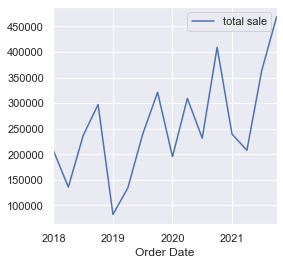

In [114]:
tech[['total sale']].resample(rule='Q').sum().plot()

<AxesSubplot:xlabel='Order Date'>

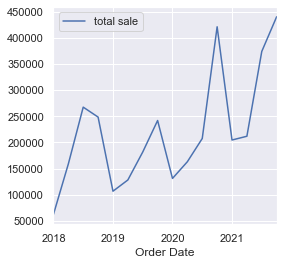

In [115]:
office[['total sale']].resample(rule='Q').sum().plot()

<AxesSubplot:xlabel='Order Date'>

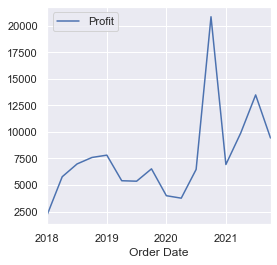

In [116]:
office[['Profit']].resample(rule='Q').sum().plot()

<AxesSubplot:xlabel='Order Date'>

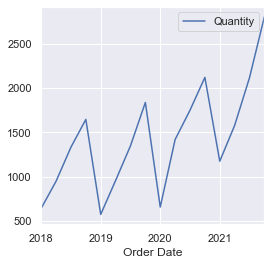

In [117]:
office[['Quantity']].resample(rule='Q').sum().plot()

In [118]:
# average value of 3 conscutive qurters
f=furniture.resample(rule='Q').mean()[['total sale','Quantity','Sales','Discount','Profit','waiting(in days)']]
f=f[['Sales','Quantity','total sale','Profit','waiting(in days)','Discount']].rolling(3).mean()

In [119]:
f

,Sales,Quantity,total sale,Profit,waiting(in days),Discount
Order Date,,,,,,
2018-03-31,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-30,366.569281,3.759931,1847.409096,10.755464,4.101205,0.174342
2018-12-31,368.707966,3.844852,1971.917588,15.775463,3.989697,0.178687
2019-03-31,420.751593,4.101025,2577.086796,5.252006,3.937536,0.178650
2019-06-30,400.221097,4.127673,2504.841170,-0.195911,4.040483,0.180323
2019-09-30,397.432234,4.007904,2364.162779,-2.733469,4.056536,0.168907
2019-12-31,352.737438,3.833181,1855.186743,9.755171,4.025881,0.166547
2020-03-31,348.479625,3.890640,1773.988618,7.170472,3.804725,0.170890


In [120]:
f.fillna(0,inplace=True)

<AxesSubplot:xlabel='Order Date'>

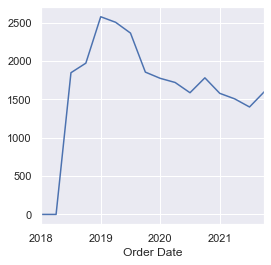

In [122]:
f['total sale'].plot()

<AxesSubplot:xlabel='Order Date'>

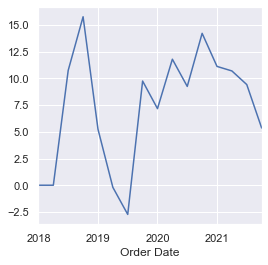

In [123]:
f['Profit'].plot()